In [1]:
import pandas as pd

In [2]:
# 데이터 불러오기
train = pd.read_csv('C:/Users/Desk_Kang/Downloads/train.csv')
test = pd.read_csv('C:/Users/Desk_Kang/Downloads/test.csv')

In [3]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [4]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [5]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [6]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [7]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

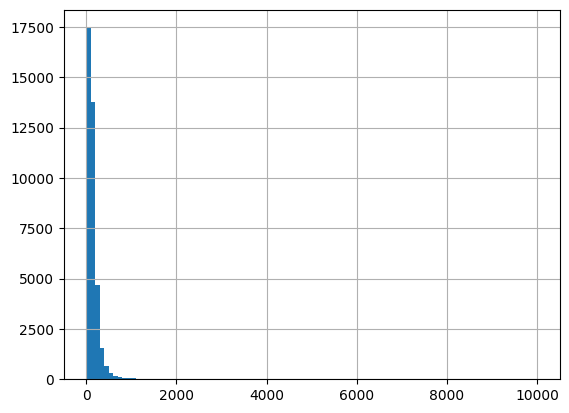

In [8]:
# target(hist)
train['price'].hist(bins=100)

In [9]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [10]:
# 피처(host_id)
train['host_id'].value_counts()

host_id
219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: count, Length: 30845, dtype: int64

In [11]:
# 결측치 컬럼 삭제(last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2.09,1,244


In [12]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)
display(train.head(5))
display(test.head(5))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,0.00,1,0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2.09,1,244
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,0.65,4,365
3,21815842,Spacious 2 bedroom in beautiful Clinton Hill,1931990,Yarden,Brooklyn,Clinton Hill,40.68859,-73.96035,Entire home/apt,3,2,0.13,1,0
4,13576581,Modern Central Park Apartment close to everything,78325795,Bozhena,Manhattan,Harlem,40.80573,-73.94994,Entire home/apt,1,160,4.31,3,246


In [13]:
# 결측치 확인
# 결측치(train,test)
# train.isnull().sum()
test.isnull().sum()

id                                0
name                              4
host_id                           0
host_name                         4
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [14]:
# 가격 값 복사
target = train['price']
train = train.drop('price',axis=1)
target

0         70
1        240
2        150
3         85
4         44
        ... 
39111    185
39112     50
39113    120
39114    165
39115    200
Name: price, Length: 39116, dtype: int64

In [15]:
# 수치형 피처 선택
cols = ['host_id','latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

train = train[cols]
test = test[cols]

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_s = scaler.fit_transform(train)
train_s[:3]

array([[ 0.33596162,  1.33623237, -0.12264396, -0.19648978, -0.45466454,
        -0.62593247, -0.15586784, -0.85804341],
       [-0.23760212,  0.57840407, -0.82054334, -0.24572646,  0.91339816,
         0.36735072, -0.15586784,  1.13174   ],
       [-0.85393972,  0.02131769, -1.15406805,  2.61000076, -0.49951905,
        -0.55721477, -0.18648566, -0.85804341]])

In [17]:
test_s = scaler.fit_transform(test)
test_s[:3]

array([[-0.42887607, -0.36157264,  0.12848508, -0.19664438, -0.47934399,
        -0.49057548, -0.18646111, -0.85216108],
       [-0.79474915,  1.17700898, -0.27606734, -0.19664438,  3.05701859,
         0.63370084, -0.18646111,  1.00460903],
       [-0.8588928 , -0.77087304, -0.23241537, -0.29057684,  0.69193533,
        -0.27582607, -0.09846469,  1.92538437]])

In [18]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_s, target, test_size=0.25, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((29337, 8), (9779, 8), (29337,), (9779,))

In [19]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

33046.03936771661

In [20]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

33046.04289740905

In [21]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

model_L = Lasso()
model_L.fit(X_train, y_train)
pred = model_L.predict(X_val)
mean_squared_error(y_val, pred)

33040.797586427834

In [22]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

model_E = ElasticNet()
model_E.fit(X_train, y_train)
pred = model_E.predict(X_val)
mean_squared_error(y_val, pred)

33337.786249803445

In [23]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model_Ran = RandomForestRegressor(random_state = 2022)
model_Ran.fit(X_train, y_train)
pred = model_Ran.predict(X_val)
mean_squared_error(y_val, pred)

33593.104802965536

In [24]:
# Xgboost
from xgboost import XGBRegressor

model_x = XGBRegressor()
model_x.fit(X_train, y_train)
pred = model_x.predict(X_val)
mean_squared_error(y_val, pred)

C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


37454.47301326349

In [25]:
# Xgboost
from xgboost import XGBRegressor

model_xgb = XGBRegressor(learning_rate = 0.02, max_depth = 5, subsample = 0.9, n_estimators = 500)
model_xgb.fit(X_train, y_train)
pred = model_xgb.predict(X_val)
mean_squared_error(y_val, pred)

C:\Users\Desk_Kang\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


31201.78974513534

In [26]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('C:/Users/Desk_Kang/Downloads/y_test.csv')
y_test_s = scaler.fit_transform(y_test)

In [27]:
# x
pred = model_x.predict(test_s)
mean_squared_error(y_test_s, pred)

50447.36506066074

In [28]:
# R
pred = model_L.predict(test_s)
mean_squared_error(y_test_s, pred)

25676.739996170338

In [29]:
# E
pred = model_E.predict(test_s)
mean_squared_error(y_test_s, pred)

24597.845569570087

In [30]:
# Ran
pred = model_Ran.predict(test_s)
mean_squared_error(y_test_s, pred)

45789.9263824586

In [34]:
# xgb
pred = model_xgb.predict(test_s)
mean_squared_error(y_test_s, pred)

39139.11544531593

In [32]:
#x는 베이스라인의 MSE 점수 xgb는 로컬에서 랜덤서치로 구한 파라미터를 통하여 계산한 결과

In [33]:
#수치형 데이터를 스탠다드 스케일링 하고 난후의 MSE 데이터가 더 뛰어남